## NUMPY

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [1]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [2]:
a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]


In [3]:
b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [4]:
a = np.zeros((2,2))   # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [5]:
b = np.ones((1,2))    # Create an array of all ones
print(b) 

[[1. 1.]]


In [6]:
c = np.full((2,2), 7)  # Create a constant array
print(c)  

[[7 7]
 [7 7]]


In [7]:
d = np.eye(2)         # Create a 2x2 identity matrix
print(d) 

[[1. 0.]
 [0. 1.]]


In [8]:
e = np.random.random((2,2))  # Create an array filled with random values
print(e)   

[[0.18285874 0.09319368]
 [0.84158509 0.7261492 ]]


We can also create desired arrays by using `reshape` function accordingly. 

In [9]:
a = np.arange(6)
print(a)

[0 1 2 3 4 5]


In [10]:
# Need a 3x2 array
np.reshape(a, (3,2))

array([[0, 1],
       [2, 3],
       [4, 5]])

In [11]:
# Need a 6x1 array
np.reshape(a, (6,1))

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

Also, the transpose of an array can be directly obtained using :

In [12]:
# Obtaining 2x3 array by taking transpose of 3x2 array
np.reshape(a, (3,2)).T

array([[0, 2, 4],
       [1, 3, 5]])

### Array indexing

Numpy offers several ways to index into arrays.

##### Slicing 

Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [13]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [14]:
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [15]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [16]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


In [17]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


##### Integer array indexing

When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [18]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print (a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print (np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


When using integer array indexing, you can reuse the same
element from the source array:

In [19]:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [20]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [21]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [22]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


##### Boolean array indexing

Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [23]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print (bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


We use boolean array indexing to construct a rank 1 array consisting of the elements of a corresponding to the True values of bool_idx

In [24]:
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [25]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print (x.dtype, y.dtype, z.dtype)

int32 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [26]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print (x + y)
print (np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [27]:
# Elementwise difference; both produce the array
print (x - y)
print (np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [28]:
# Elementwise product; both produce the array
print (x * y)
print (np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [29]:
# Elementwise division; both produce the array
print (x / y)
print (np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [30]:
# Elementwise square root; produces the array
print (np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [31]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print (v.dot(w))
print (np.dot(v, w))

219
219


In [32]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print (x.dot(v))
print (np.dot(x, v))

[29 67]
[29 67]


In [33]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print (x.dot(y))
print (np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [34]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [35]:
print (x)
print (x.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [36]:
v = np.array([[1,2,3]])
print (v) 
print (v.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [37]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print (y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [38]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print (vv)

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [39]:
y = x + vv  # Add x and vv elementwise
print (y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [40]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print (y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [41]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print (np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [42]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print (x + v)

[[2 4 6]
 [5 7 9]]


In [43]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print ((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [44]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print (x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [45]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print (x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## MATPLOTLIB

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [46]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [47]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

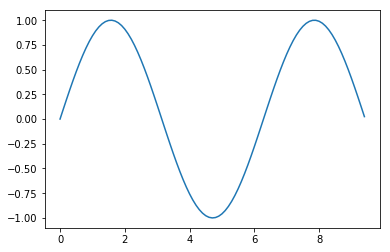

In [48]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

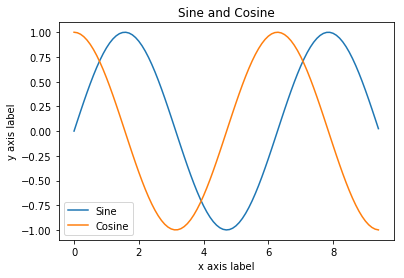

In [49]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

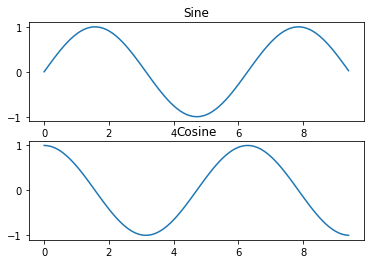

In [50]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

### Examples

Let us generate some simple datasets and plot them using Matplotlib

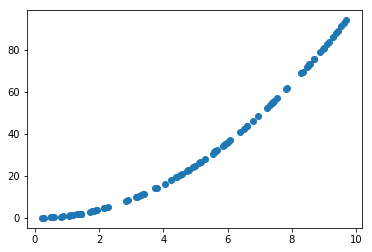

In [51]:
# Generate 100 numbers from a uniform random distribution between 0 and 10 and target variable is a quadratic function
x = np.random.uniform(low=0, high=10, size=100)
y = [n**2 for n in x]

plt.scatter(x, y)
plt.show()

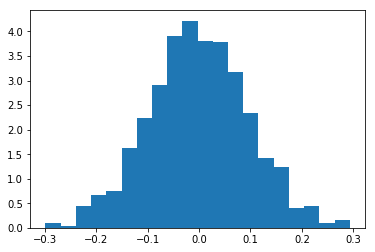

In [52]:
# Generate 1000 samples from a normal distribution with mean 0 and standard deviation 0.1
x = np.random.normal(loc=0, scale=0.1, size=1000)
plt.hist(x, bins=20, density=True) # Plotting a histogram
plt.show()

## PANDAS

Pandas is a library that provides easy exploration and analysis of data sets in Python. 

In [53]:
import pandas as pd

### Reading Data

We will commonly come across two formats for storing data : Series and Dataframe. 
Series is analogous to a single column of data (one dimensional array), while Dataframe is a collection of Series.

In [54]:
# Creating a Series
pd.Series([1, 2, 3, 4], name='Test Series')

0    1
1    2
2    3
3    4
Name: Test Series, dtype: int64

Default row numbers (called index) start from 0, but can be manually set.

In [55]:
pd.Series([1, 2, 3, 4], index=['a','b','c','d'], name='Test Series')

a    1
b    2
c    3
d    4
Name: Test Series, dtype: int64

Dataframe is a collection of Series, and is displayed in a tabular format.

In [56]:
# Creating a DataFrame
pd.DataFrame({'Col1':[1, 2, 3, 4], 'Col2':['a','b','c','d']})

Col1 Col2
0     1    a
1     2    b
2     3    c
3     4    d

Generally, datasets are stored as .csv files, and can be imported using the `pd.read_csv('filename')` function.

### Data Exploration

##### Basic

Pandas provides a lot of functions to analyse and explore any dataset stored as a DataFrame. Let's create a test dataset and use some of these functions.

In [57]:
# Creating DataFrame
cricketData = pd.DataFrame({
    'Player Name' : ['V Kuhli', 'S Tendehar', 'Ruhit Shorma', 'D Dhenier', 'Yevray Singh', 'G Gemphir'],
    'No. of 50s' : [50, 60, 47, 40, 37, 39],
    'No. of 100s' : [23, 26, 15, 12, 14, 9],
    'Retired' : [False, True, False, False, False, True]
})

In [58]:
# .head() returns top n entries, where n by default is 5
cricketData.head()

Player Name  No. of 50s  No. of 100s  Retired
0       V Kuhli          50           23    False
1    S Tendehar          60           26     True
2  Ruhit Shorma          47           15    False
3     D Dhenier          40           12    False
4  Yevray Singh          37           14    False

In [59]:
# .describe() returns statistical information for all numerical columns
cricketData.describe()

No. of 50s  No. of 100s
count    6.000000     6.000000
mean    45.500000    16.500000
std      8.689074     6.595453
min     37.000000     9.000000
25%     39.250000    12.500000
50%     43.500000    14.500000
75%     49.250000    21.000000
max     60.000000    26.000000

In [60]:
# .info() returns a list of all the columns and the number of non-null entries in each
cricketData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
Player Name    6 non-null object
No. of 50s     6 non-null int64
No. of 100s    6 non-null int64
Retired        6 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 230.0+ bytes


In [61]:
print(cricketData.shape)    # shape of dataframe
print(cricketData.columns)  # lists all columns of dataframe
print(cricketData.dtypes)   # returns dtypes of all columns

(6, 4)
Index(['Player Name', 'No. of 50s', 'No. of 100s', 'Retired'], dtype='object')
Player Name    object
No. of 50s      int64
No. of 100s     int64
Retired          bool
dtype: object


In [62]:
print(cricketData['Retired'].value_counts())  # Returns all unique values of a particular column and their counts

False    4
True     2
Name: Retired, dtype: int64


##### NaN

Real datasets have a lot of data that is invalid/not known. Such data is generally stored as `NaN` or 'Not a Number' in Python.
Pandas has functions to deal with `NaN` data directly.

In [63]:
# Let us assume that the no. of 50s of Dhenier and Tendehar are not known. 
# We'll set values for these indexes (1 and 3) to NaN using np.nan (loc is explained later)
cricketData.loc[1, 'No. of 50s'] = np.nan
cricketData.loc[3, 'No. of 50s'] = np.nan

In [64]:
# Seeing the data now
cricketData

Player Name  No. of 50s  No. of 100s  Retired
0       V Kuhli        50.0           23    False
1    S Tendehar         NaN           26     True
2  Ruhit Shorma        47.0           15    False
3     D Dhenier         NaN           12    False
4  Yevray Singh        37.0           14    False
5     G Gemphir        39.0            9     True

In [65]:
cricketData.info()
# .info() now correctly shows only 4 non-null values for no. of 50s

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
Player Name    6 non-null object
No. of 50s     4 non-null float64
No. of 100s    6 non-null int64
Retired        6 non-null bool
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 230.0+ bytes


In [66]:
# isna() returns a boolean DataFrame signifying which values in DataFrame are NaN
cricketData.isna()

Player Name  No. of 50s  No. of 100s  Retired
0        False       False        False    False
1        False        True        False    False
2        False       False        False    False
3        False        True        False    False
4        False       False        False    False
5        False       False        False    False

In [67]:
# fillna() replaces all NaN values with given value.
# Can also use some statistical estimate like mean or median to replace NaN values
cricketData.fillna(value=0)

Player Name  No. of 50s  No. of 100s  Retired
0       V Kuhli        50.0           23    False
1    S Tendehar         0.0           26     True
2  Ruhit Shorma        47.0           15    False
3     D Dhenier         0.0           12    False
4  Yevray Singh        37.0           14    False
5     G Gemphir        39.0            9     True

In [68]:
# dropna() drops all entries that have any NaN values in them
cricketData.dropna()

Player Name  No. of 50s  No. of 100s  Retired
0       V Kuhli        50.0           23    False
2  Ruhit Shorma        47.0           15    False
4  Yevray Singh        37.0           14    False
5     G Gemphir        39.0            9     True

##### Selection 

We use the `iloc` function to do index-based selection, that is we can use indexes of both rows and columns to select data.

In [69]:
# Entire first row
cricketData.iloc[0]

Player Name    V Kuhli
No. of 50s          50
No. of 100s         23
Retired          False
Name: 0, dtype: object

In [70]:
# Entire zero index column
cricketData.iloc[:, 0]

0         V Kuhli
1      S Tendehar
2    Ruhit Shorma
3       D Dhenier
4    Yevray Singh
5       G Gemphir
Name: Player Name, dtype: object

In [71]:
# Columns with index 1 to 3 (exclusive)
cricketData.iloc[:, 1:3]

No. of 50s  No. of 100s
0        50.0           23
1         NaN           26
2        47.0           15
3         NaN           12
4        37.0           14
5        39.0            9

In [72]:
# Selects 1st, 2nd row entry in 0th column
cricketData.iloc[1:3, 0]

1      S Tendehar
2    Ruhit Shorma
Name: Player Name, dtype: object

In [73]:
# Selects 1st, 3rd row entry in 1st column
cricketData.iloc[[1,3], 1]

1   NaN
3   NaN
Name: No. of 50s, dtype: float64

We use the `loc` function to do label-based or conditional selection.

In [74]:
# First entry of column 'Player Name'
cricketData.loc[0, 'Player Name']

'V Kuhli'

In [75]:
# All entries of columns 'Player Name' and 'Retired'
cricketData.loc[:, ['Player Name', 'Retired']]

Player Name  Retired
0       V Kuhli    False
1    S Tendehar     True
2  Ruhit Shorma    False
3     D Dhenier    False
4  Yevray Singh    False
5     G Gemphir     True

In [76]:
# Entries with no. of 100s greater than 20
cricketData.loc[cricketData['No. of 100s'] > 20]

Player Name  No. of 50s  No. of 100s  Retired
0     V Kuhli        50.0           23    False
1  S Tendehar         NaN           26     True

In [77]:
# Entries with no. of 100s greater than 20 and not retired
cricketData.loc[(cricketData['No. of 100s'] > 20) & (cricketData['Retired'])]

Player Name  No. of 50s  No. of 100s  Retired
1  S Tendehar         NaN           26     True

In [78]:
# Entries with no. of 50s data available
cricketData.loc[cricketData['No. of 50s'].notnull()]

Player Name  No. of 50s  No. of 100s  Retired
0       V Kuhli        50.0           23    False
2  Ruhit Shorma        47.0           15    False
4  Yevray Singh        37.0           14    False
5     G Gemphir        39.0            9     True

##### Grouping and Mapping

We can group all entries of a dataframe with respect from a particular column, and analyse the distribution of values of other columns values then.

In [79]:
# We want to compare the statistics (sum, max, mean, median) of No. of 100s and 50s 
# between players who are retired and who are not
cricketData.groupby('Retired')['No. of 100s', 'No. of 50s'].agg([sum, max, np.mean, np.median])

No. of 100s                  No. of 50s                        
                sum max  mean median        sum   max       mean median
Retired                                                                
False            64  23  16.0   14.5      134.0  50.0  44.666667   47.0
True             35  26  17.5   17.5       39.0  39.0  39.000000   39.0

We can use mapping functions to change directly values of dataframe based on some direct function.

In [80]:
# Suppose all players scored a century in a match, and we need to update the database accordingly
cricketData['No. of 100s'] = cricketData['No. of 100s'].map(lambda x : x + 1)   # Mapping function for a Series
cricketData

Player Name  No. of 50s  No. of 100s  Retired
0       V Kuhli        50.0           24    False
1    S Tendehar         NaN           27     True
2  Ruhit Shorma        47.0           16    False
3     D Dhenier         NaN           13    False
4  Yevray Singh        37.0           15    False
5     G Gemphir        39.0           10     True

In [81]:
# Suppose the board decides to retire a player who's centuries are less than 15

def retireFunc(row):
    if row['No. of 100s'] <= 15:
        row['Retired'] = True
    return row

cricketData.apply(retireFunc, axis='columns')

Player Name  No. of 50s  No. of 100s  Retired
0       V Kuhli        50.0           24    False
1    S Tendehar         NaN           27     True
2  Ruhit Shorma        47.0           16    False
3     D Dhenier         NaN           13     True
4  Yevray Singh        37.0           15     True
5     G Gemphir        39.0           10     True